# LOGISTIC REGRESSION vs LINEAR REGRESSION
## Comparing results and visualization

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

create sample data

In [30]:
data = {'hoursOfStudy': [1, 2, 3, 3, 5, 8, 9, 10, 11, 12, 13, 13, 17, 19, 21, 22, 23, 23, 24, 26, 27, 29, 30, 34, 36, 37, 39, 40, 42, 47],
        'passing': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]}
df = pd.DataFrame(data)

Text(0, 0.5, 'Pass/Fail')

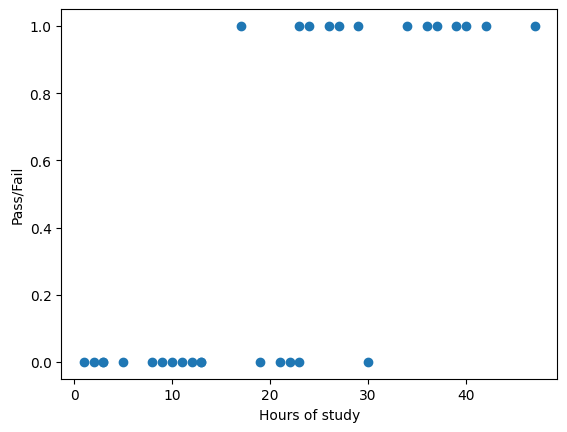

In [31]:
plt.scatter(df['hoursOfStudy'], df['passing'])
plt.xlabel("Hours of study")
plt.ylabel("Pass/Fail")

In [32]:
X = df['hoursOfStudy']
y = df['passing']

Train/Test split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**LINEAR REGRESSION MODEL**

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X_train_array = np.array(X_train).reshape(-1,1)
X_test_array = np.array(X_test).reshape(-1,1)

model1 = lin_reg.fit(X_train_array,y_train)

y_train_pred_lin = model1.predict(X_train_array)
y_test_pred_lin = model1.predict(X_test_array)

visualization

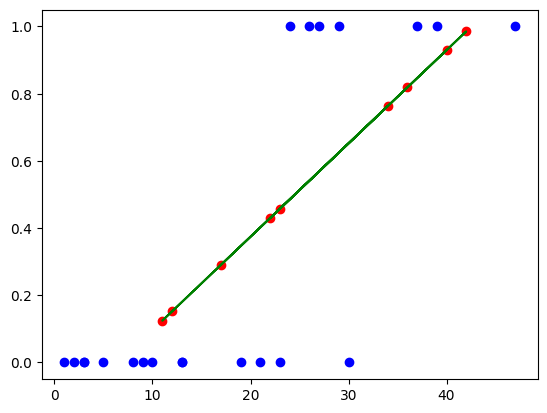

In [35]:
# Scatter plot
plt.scatter(X_train_array, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test_pred_lin, color='red', label='Test Predictions')

# Best-fit line
plt.plot(X_test, y_test_pred_lin, color='green', label='Best Fit Line')



**LOGISTIC REGRESSION MODEL**

In [36]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

model2 = log_reg.fit(X_train_array,y_train)

# Predicted probability of 2 classes
y_pred_test_prob = model2.predict_proba(X_test_array)
y_pred_test_prob

array([[0.00618751, 0.99381249],
       [0.73192688, 0.26807312],
       [0.04516552, 0.95483448],
       [0.66070827, 0.33929173],
       [0.99118177, 0.00881823],
       [0.98767968, 0.01232032],
       [0.00315705, 0.99684295],
       [0.02349617, 0.97650383],
       [0.93668735, 0.06331265]])

In [37]:
# Predicted probability of class 1
y_predict_prob_class_1 = y_pred_test_prob[:,1]
y_predict_prob_class_1

array([0.99381249, 0.26807312, 0.95483448, 0.33929173, 0.00881823,
       0.01232032, 0.99684295, 0.97650383, 0.06331265])

In [38]:
sorted_index = np.argsort(X_test_array.flatten())
x_test_sorted = X_test_array[sorted_index]
y_predict_prob_sorted = y_pred_test_prob[:, 1][sorted_index]
y_predict_prob_sorted

array([0.00881823, 0.01232032, 0.06331265, 0.26807312, 0.33929173,
       0.95483448, 0.97650383, 0.99381249, 0.99684295])

Visualization

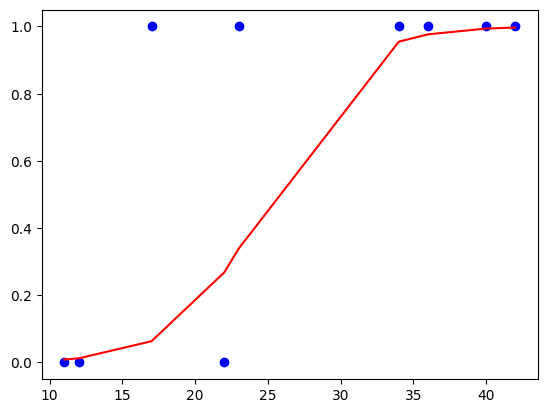

In [39]:
plt.scatter(X_test_array, y_test, color='blue', label='Actual Data')

# Sort the x_test_array for plotting the logistic curve
sorted_index = np.argsort(X_test_array.flatten())
x_test_sorted = X_test_array[sorted_index]
y_predict_prob_sorted = y_pred_test_prob[:, 1][sorted_index]

# # Plot the logistic curve
plt.plot(x_test_sorted, y_predict_prob_sorted, color='red', label='Logistic Curve')

# Scatter plot
# plt.scatter(x_test_array, y_test, color='blue', label='Actual Data')

# # Plot the logistic curve
# plt.plot(x_test_array, y_predict_prob[:, 1], color='red', label='Logistic Curve')

In [40]:

# threshold = 0.4
y_predict_class = [1 if prob > 0.4 else 0 for prob in y_predict_prob_class_1]

# Model evaluation on accuracy
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3))

Accuracy: 0.778
